#### Data visualization about LoL_champions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data 
cham_df = pd.read_csv("Lol_champions.csv")
cham_df

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.00,0.00,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.00,0.80,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.00,0.00,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.20,0.70,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.50,0.80,62,3.75,2.125,0.625,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Zeri,Marksman,Bottom,Ranged,Mana,600,110,250,45.0,330,...,500,3.25,0.70,6.00,0.80,56,2.00,2.000,0.658,0.625
163,Ziggs,Mage,"Bottom,Middle",Ranged,Mana,606,106,480,23.5,325,...,550,6.50,0.60,8.00,0.80,55,3.10,2.000,0.656,0.656
164,Zilean,"Support,Mage",Support,Ranged,Mana,574,96,452,50.0,335,...,550,5.50,0.50,11.35,0.80,52,3.00,2.130,0.658,0.625
165,Zoe,Mage,Middle,Ranged,Mana,630,106,425,25.0,340,...,550,7.50,0.60,8.00,0.65,58,3.30,2.500,0.658,0.625


### The highest hp champion
* in early game
* in mid game
* in late game
* growing at level

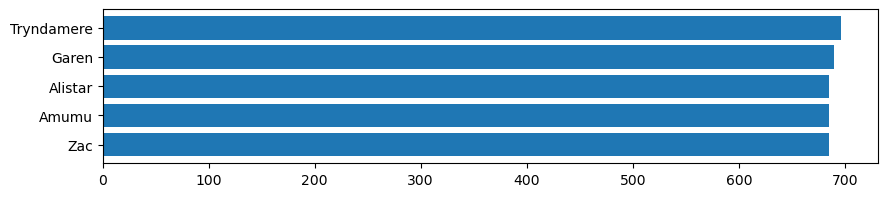

In [ ]:
# what is the highest base  hp champion
plt.figure(figsize = [10,2])
plt.barh(cham_df.sort_values(by = "Base HP")["Name"][-5:], cham_df["Base HP"].sort_values()[-5:]);

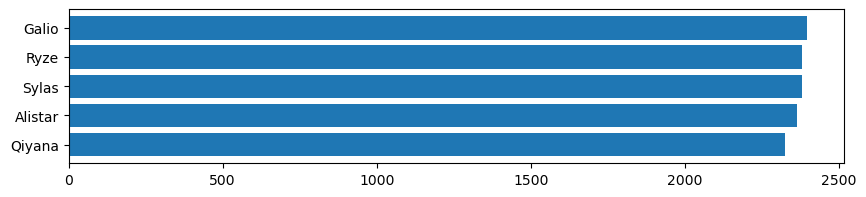

In [ ]:
# what is the highest hp champion at late game
plt.figure(figsize = [10,2])
plt.barh(cham_df.sort_values(by = "HP_lv15")["Name"][-5:], cham_df["HP_lv15"].sort_values()[-5:]);

In [94]:
# hp of champions growing up at level
for i in range(2,16):
    cham_df[f"HP_lv{i}"] = cham_df["Base HP"] + cham_df["HP per lvl"]*(i-1)
    
mau = cham_df.filter(like='HP_lv')
mau
cot_lv10 = cham_df.pop('HP_lv10')
cham_df.insert(32, 'HP_lv10', cot_lv10)
mau.index = cham_df.Name
mau


,HP_lv2,HP_lv3,HP_lv4,HP_lv5,HP_lv6,HP_lv7,HP_lv8,HP_lv9,HP_lv10,HP_lv11,HP_lv12,HP_lv13,HP_lv14,HP_lv15
Name,,,,,,,,,,,,,,
Aatrox,764,878,992,1106,1220,1334,1448,1562,1676,1790,1904,2018,2132,2246
Ahri,694,798,902,1006,1110,1214,1318,1422,1526,1630,1734,1838,1942,2046
Akali,719,838,957,1076,1195,1314,1433,1552,1671,1790,1909,2028,2147,2266
Akshan,737,844,951,1058,1165,1272,1379,1486,1593,1700,1807,1914,2021,2128
Alistar,805,925,1045,1165,1285,1405,1525,1645,1765,1885,2005,2125,2245,2365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeri,710,820,930,1040,1150,1260,1370,1480,1590,1700,1810,1920,2030,2140
Ziggs,712,818,924,1030,1136,1242,1348,1454,1560,1666,1772,1878,1984,2090
Zilean,670,766,862,958,1054,1150,1246,1342,1438,1534,1630,1726,1822,1918


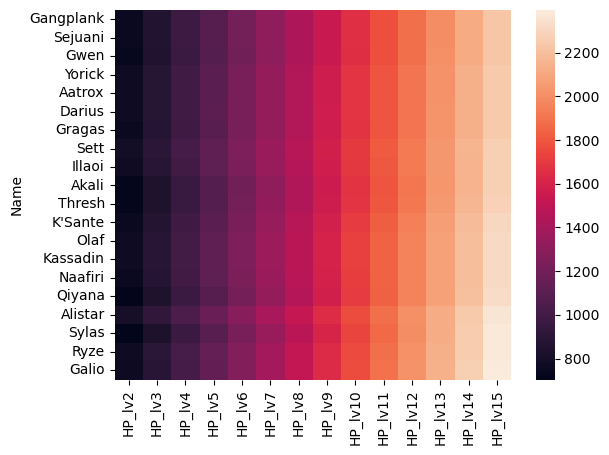

In [ ]:
 # HP growth over time for champions with the highest late-game HP
sns.heatmap(data = mau.sort_values(by ="HP_lv15")[-20:]);

In [53]:
maut = mau.sort_values(by = "HP_lv15").T
maut


,159,64,37,112,84,79,123,113,47,124,...,133,66,92,57,83,98,4,126,109,34
HP_lv2,569,494,619,619,648,648,641,660,660,693,...,720,745,764,765,755,714,805,704,769,758
HP_lv3,638,578,698,708,736,736,732,750,750,781,...,840,865,883,884,875,838,925,833,893,884
HP_lv4,707,662,777,797,824,824,823,840,840,869,...,960,985,1002,1003,995,962,1045,962,1017,1010
HP_lv5,776,746,856,886,912,912,914,930,930,957,...,1080,1105,1121,1122,1115,1086,1165,1091,1141,1136
HP_lv6,845,830,935,975,1000,1000,1005,1020,1020,1045,...,1200,1225,1240,1241,1235,1210,1285,1220,1265,1262
HP_lv7,914,914,1014,1064,1088,1088,1096,1110,1110,1133,...,1320,1345,1359,1360,1355,1334,1405,1349,1389,1388
HP_lv8,983,998,1093,1153,1176,1176,1187,1200,1200,1221,...,1440,1465,1478,1479,1475,1458,1525,1478,1513,1514
HP_lv9,1052,1082,1172,1242,1264,1264,1278,1290,1290,1309,...,1560,1585,1597,1598,1595,1582,1645,1607,1637,1640
HP_lv10,1121,1166,1251,1331,1352,1352,1369,1380,1380,1397,...,1680,1705,1716,1717,1715,1706,1765,1736,1761,1766
HP_lv11,1190,1250,1330,1420,1440,1440,1460,1470,1470,1485,...,1800,1825,1835,1836,1835,1830,1885,1865,1885,1892


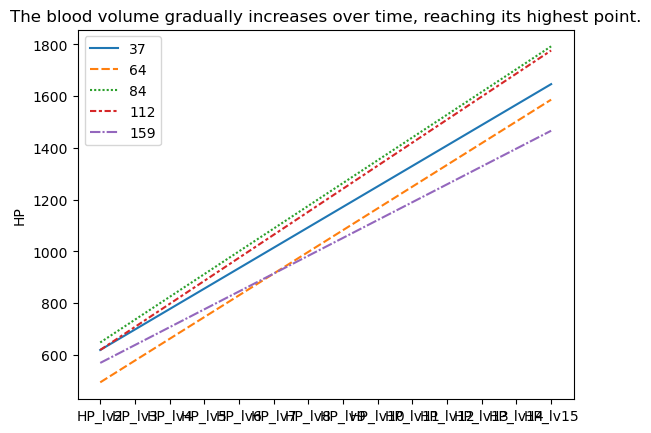

<Figure size 1000x100000 with 0 Axes>

In [85]:
# The champion has the highest health points throughout the match.
fig, ax = plt.subplots()
sns.lineplot(data = maut.iloc[:,:5]);
plt.figure(figsize = [10,1000]);
ax.set(title = "The blood volume gradually increases over time, reaching its highest point.",
       ylabel = "HP" );


<Axes: xlabel='Base HP', ylabel='HP per lvl'>

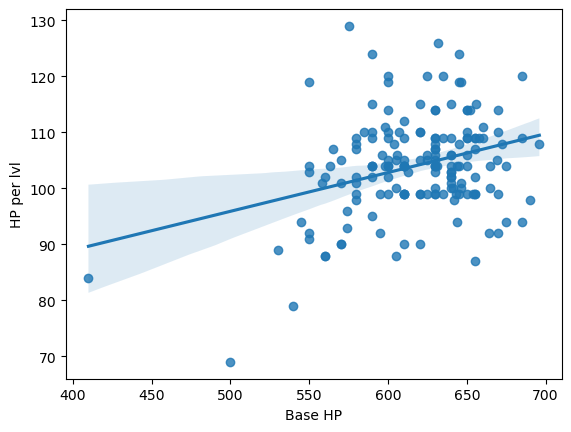

In [ ]:
# In general, champions with high health in the early game will have more health gain over time.
sns.regplot(data = cham_df, x = "Base HP", y = "HP per lvl")

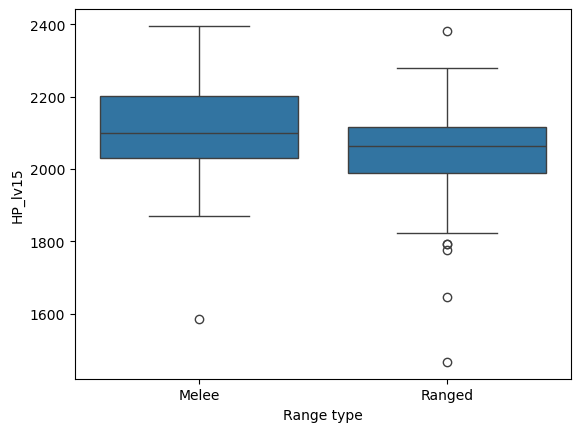

In [ ]:
sns.boxplot(data = cham_df,x = "Range type", y = "HP_lv15");
# We can see that ranged champions generally have lower health than melee champions.
